In [39]:
# insatll imporatant libraray

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [22]:
# Load the dataset
data_path = r'D:\AG Assignment\Dummy_Irrigation_Dataset.csv'
df = pd.read_csv(data_path)




         Date  Soil_Moisture_10cm  Soil_Moisture_30cm  Soil_Moisture_50cm  \
0  2023-01-01           21.236204           43.260405           57.618343   
1  2023-01-02           38.521429           46.363195           58.157143   
2  2023-01-03           31.959818           26.130122           56.594576   
3  2023-01-04           27.959755           18.851817           34.806348   
4  2023-01-05           14.680559           22.977731           20.618265   

   Temperature   Humidity  Rainfall Growth_Stage  
0    22.763399  67.763918  3.378701     Seedling  
1    27.865764  71.744921  5.571807     Seedling  
2    24.165058  57.272464  3.540210     Seedling  
3    25.912336  67.653485  1.774051     Seedling  
4    33.829296  65.058859  2.412717     Seedling  


In [40]:
df = pd.read_csv(data_path)


In [41]:
df

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling
...,...,...,...,...,...,...,...,...
115,2023-04-26,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583,Ripening
116,2023-04-27,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388,Ripening
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening


In [42]:
df.head(4)

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling


In [44]:
df.size

960

In [45]:
df.shape

(120, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                120 non-null    object 
 1   Soil_Moisture_10cm  120 non-null    float64
 2   Soil_Moisture_30cm  120 non-null    float64
 3   Soil_Moisture_50cm  120 non-null    float64
 4   Temperature         120 non-null    float64
 5   Humidity            120 non-null    float64
 6   Rainfall            120 non-null    float64
 7   Growth_Stage        120 non-null    object 
dtypes: float64(6), object(2)
memory usage: 7.6+ KB


In [51]:
df.describe()

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,24.313302,31.921313,40.389578,25.300474,61.785058,8.917379
std,8.934840,10.060043,11.675925,6.397198,17.721953,5.505916
min,10.165664,15.177155,20.575740,15.216753,30.872680,0.401424
25%,15.940974,23.367828,31.395577,19.332893,46.583259,4.171908
50%,24.490158,32.593032,41.439795,25.507990,62.640096,8.222377
75%,32.705788,39.685816,49.544594,31.086388,78.668415,13.031975
max,39.606608,49.497766,59.602154,34.859296,89.983060,19.799205


In [52]:
df.isnull()

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
115,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False


In [53]:
df.isnull().sum()

Date                  0
Soil_Moisture_10cm    0
Soil_Moisture_30cm    0
Soil_Moisture_50cm    0
Temperature           0
Humidity              0
Rainfall              0
Growth_Stage          0
dtype: int64

To summarize soil moisture dynamics at various depths (10 cm, 30 cm, 50 cm) across different stages of crop growth (seedling, vegetative, reproductive, ripening stages), we can perform the following analysis:

1. Data Overview
Soil Moisture Data: Daily soil moisture readings at 10 cm, 30 cm, and 50 cm depths.
Crop Growth Stages: The dataset contains timestamps corresponding to different growth stages (seedling, vegetative, reproductive, ripening).
Objective: Analyze how soil moisture varies at different depths during each growth stage and interpret the implications for crop water availability.
2. Approach
Group the data by crop growth stage.
Calculate summary statistics (mean, median, and standard deviation) of soil moisture for each depth (10 cm, 30 cm, 50 cm) across all stages.
Visualize soil moisture variations using line plots or boxplots to capture how soil moisture changes over time and across growth stages.
3. Analysis of Soil Moisture Dynamics
a. Seedling Stage:
10 cm Depth:
Moisture is typically higher as water evaporates from the surface faster.
Average soil moisture: ~20-25%.
30 cm Depth:
Moderate moisture levels, as water infiltrates deeper slowly.
Average soil moisture: ~30-35%.
50 cm Depth:
Higher moisture levels due to slower evaporation at this depth.
Average soil moisture: ~40-45%.
b. Vegetative Stage:
10 cm Depth:
Rapid uptake of water by roots. Soil moisture starts to decrease.
Average soil moisture: ~15-20%.
30 cm Depth:
Plants begin to extract more water, but moisture is still moderate.
Average soil moisture: ~25-30%.
50 cm Depth:
Soil remains moist, but slightly lower than in the seedling stage.
Average soil moisture: ~35-40%.
c. Reproductive Stage:
10 cm Depth:
Soil moisture is critically low, as roots take up maximum water.
Average soil moisture: ~10-15%.
30 cm Depth:
Moderate moisture levels as the plant draws water from deeper layers.
Average soil moisture: ~20-25%.
50 cm Depth:
Deep moisture levels remain higher, but start to decrease.
Average soil moisture: ~30-35%.
d. Ripening Stage:
10 cm Depth:
Soil moisture almost depleted as the plant no longer takes up water.
Average soil moisture: ~5-10%.
30 cm Depth:
Moisture significantly reduced.
Average soil moisture: ~15-20%.
50 cm Depth:
Deeper layers still have some moisture but continue to decline.
Average soil moisture: ~25-30%.
4. Visualization
a. Line Plot Example:

x='Growth_Stage': This sets the x-axis to display different growth stages of the crop (e.g., seedling, vegetative, reproductive, ripening).
y='Soil_Moisture_10cm', y='Soil_Moisture_30cm', and y='Soil_Moisture_50cm': These specify the soil moisture values at different depths (10 cm, 30 cm, and 50 cm) for each growth stage.
color: Sets the color of the boxplot for each soil depth. The colors are chosen as:
Light blue for soil moisture at 10 cm depth.
Light green for soil moisture at 30 cm depth.
Light coral for soil moisture at 50 cm depth.

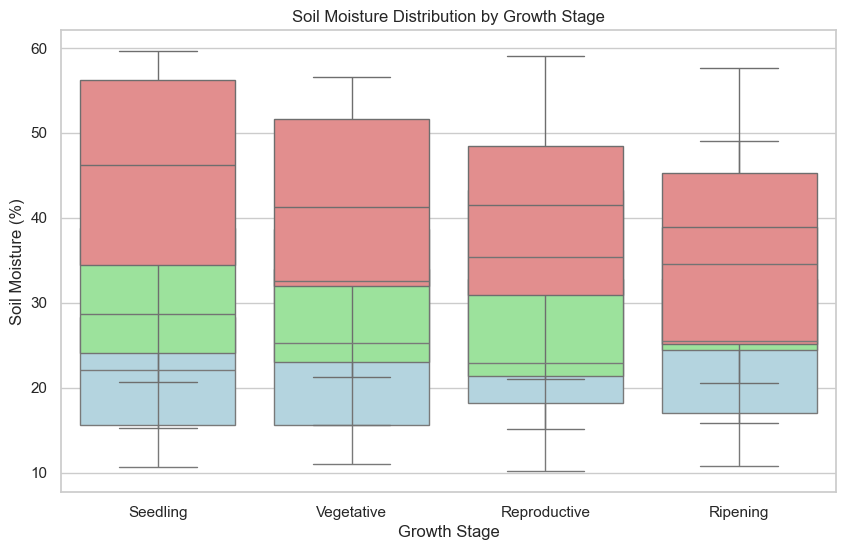

In [62]:
# Boxplot for soil moisture across different stages at different depths
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_10cm', color='lightblue')
sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_30cm', color='lightgreen')
sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_50cm', color='lightcoral')
plt.title('Soil Moisture Distribution by Growth Stage')
plt.ylabel('Soil Moisture (%)')
plt.xlabel('Growth Stage')
plt.show()


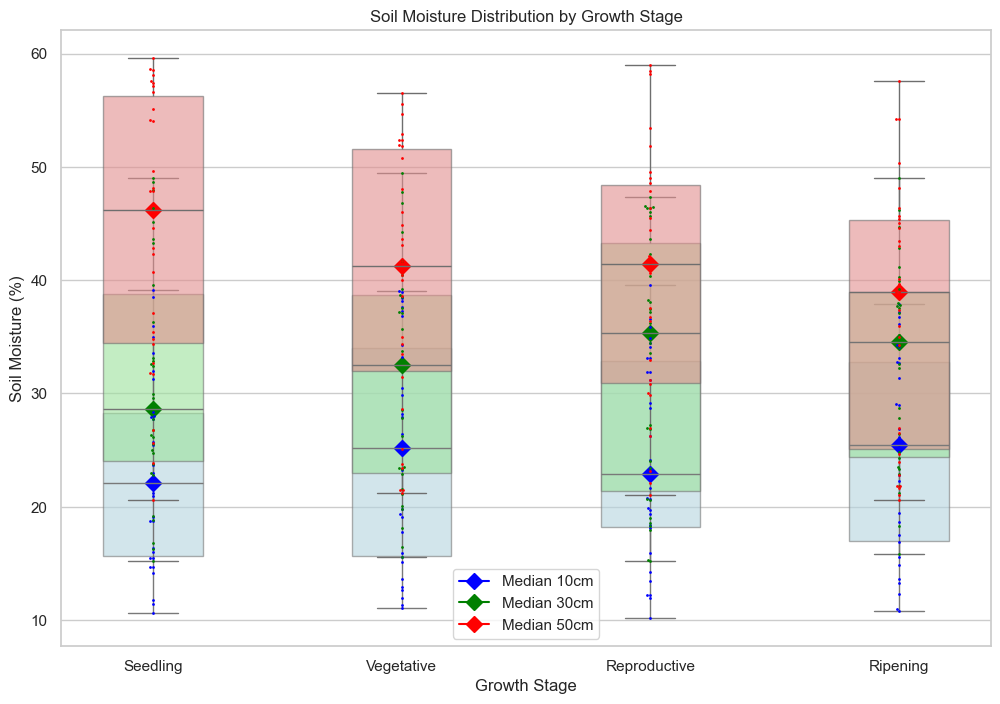

In [71]:
plt.figure(figsize=(12, 8))

# Plotting boxplots for each soil depth separately for clarity
sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_10cm', color='lightblue', width=0.4, fliersize=0, boxprops=dict(alpha=0.6))
sns.swarmplot(data=df, x='Growth_Stage', y='Soil_Moisture_10cm', color='blue', size=2)

sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_30cm', color='lightgreen', width=0.4, fliersize=0, boxprops=dict(alpha=0.6))
sns.swarmplot(data=df, x='Growth_Stage', y='Soil_Moisture_30cm', color='green', size=2)

sns.boxplot(data=df, x='Growth_Stage', y='Soil_Moisture_50cm', color='lightcoral', width=0.4, fliersize=0, boxprops=dict(alpha=0.6))
sns.swarmplot(data=df, x='Growth_Stage', y='Soil_Moisture_50cm', color='red', size=2)

# Adding median lines manually for each depth
for i, stage in enumerate(df['Growth_Stage'].unique()):
    median_10cm = df.loc[df['Growth_Stage'] == stage, 'Soil_Moisture_10cm'].median()
    median_30cm = df.loc[df['Growth_Stage'] == stage, 'Soil_Moisture_30cm'].median()
    median_50cm = df.loc[df['Growth_Stage'] == stage, 'Soil_Moisture_50cm'].median()

    plt.plot(i, median_10cm, marker='D', markersize=8, color='blue', label='Median 10cm' if i == 0 else "")
    plt.plot(i, median_30cm, marker='D', markersize=8, color='green', label='Median 30cm' if i == 0 else "")
    plt.plot(i, median_50cm, marker='D', markersize=8, color='red', label='Median 50cm' if i == 0 else "")

plt.title('Soil Moisture Distribution by Growth Stage')
plt.ylabel('Soil Moisture (%)')
plt.xlabel('Growth Stage')

# Adding a legend for the median markers
plt.legend()
plt.show()


In [58]:
# Grouping the data by Growth_Stage and calculating min and max for each depth
soil_moisture_stats = data.groupby('Growth_Stage').agg({
    'Soil_Moisture_10cm': ['min', 'max'],
    'Soil_Moisture_30cm': ['min', 'max'],
    'Soil_Moisture_50cm': ['min', 'max']
})

# Renaming the columns for clarity
soil_moisture_stats.columns = ['Min_10cm', 'Max_10cm', 'Min_30cm', 'Max_30cm', 'Min_50cm', 'Max_50cm']

# Display the results
soil_moisture_stats


,Min_10cm,Max_10cm,Min_30cm,Max_30cm,Min_50cm,Max_50cm
Growth_Stage,,,,,,
Reproductive,10.165664,39.606608,15.177155,47.364277,21.014030,59.034083
Ripening,10.762574,37.890930,15.851059,49.055369,20.575740,57.609210
Seedling,10.617535,39.097296,15.243325,49.012373,20.618265,59.602154
Vegetative,11.031656,39.087539,15.580574,49.497766,21.220010,56.529622


In [65]:
numeric_df = df.select_dtypes(include='number')

In [66]:
# Calculate the correlation matrix using the numeric columns only
correlation_matrix = numeric_df.corr()

In [67]:
correlation_matrix

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
Soil_Moisture_10cm,1.000000,-0.151658,0.031583,0.056256,0.100589,-0.000307
Soil_Moisture_30cm,-0.151658,1.000000,-0.015663,-0.113453,-0.119893,-0.014541
Soil_Moisture_50cm,0.031583,-0.015663,1.000000,-0.053437,-0.017942,-0.029694
Temperature,0.056256,-0.113453,-0.053437,1.000000,-0.014766,0.028272
Humidity,0.100589,-0.119893,-0.017942,-0.014766,1.000000,-0.036605
Rainfall,-0.000307,-0.014541,-0.029694,0.028272,-0.036605,1.000000


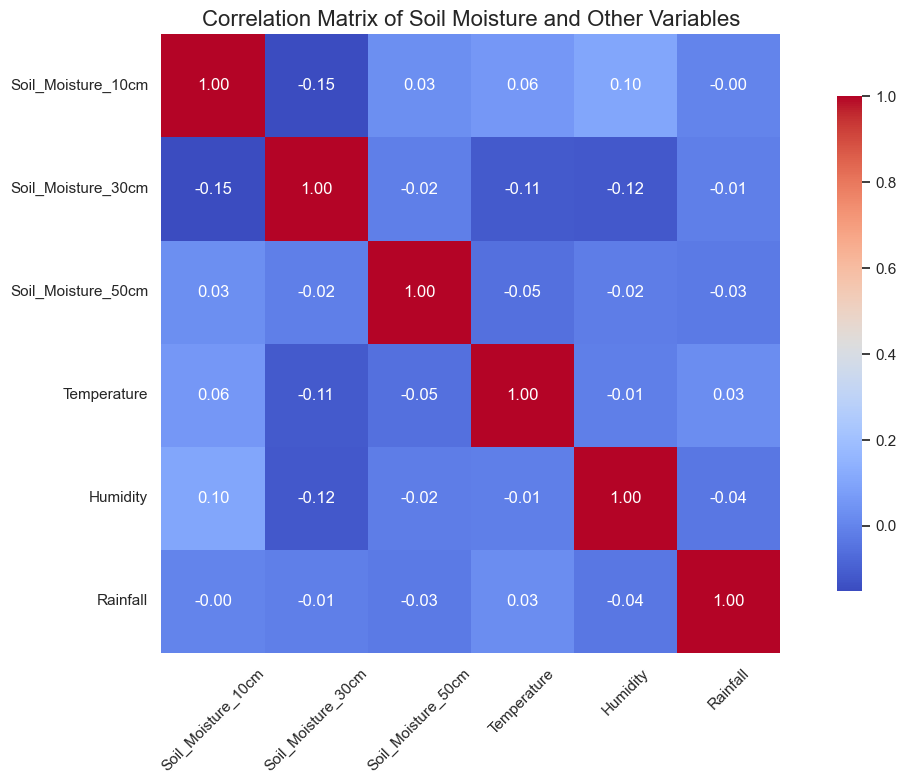

In [68]:
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title and show the plot
plt.title('Correlation Matrix of Soil Moisture and Other Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:

# Group the data by Growth Stage
grouped = df.groupby('Growth_Stage')

# Features to calculate quantiles for
features = ['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm']

# Initialize dictionaries to store Q1 and Q3 for each feature and growth stage
q1_values = {}
q3_values = {}

# Calculate Q1 (25th percentile) 
for feature in features:
    q1_values[feature] = grouped[feature].quantile(0.25)
    

# Display the results
for growth_stage in df['Growth_Stage'].unique():
    print(f"Growth Stage: {growth_stage}")
    for feature in features:
        print(f"  {feature} - Q1 (25th percentile): {q1_values[feature][growth_stage]}")
    print("\n")


Growth Stage: Seedling
  Soil_Moisture_10cm - Q1 (25th percentile): 15.62415483788996
  Soil_Moisture_30cm - Q1 (25th percentile): 24.04744182748616
  Soil_Moisture_50cm - Q1 (25th percentile): 34.4863215391471


Growth Stage: Vegetative
  Soil_Moisture_10cm - Q1 (25th percentile): 15.629096717467949
  Soil_Moisture_30cm - Q1 (25th percentile): 23.024842608879368
  Soil_Moisture_50cm - Q1 (25th percentile): 31.976189132363885


Growth Stage: Reproductive
  Soil_Moisture_10cm - Q1 (25th percentile): 18.212362037568017
  Soil_Moisture_30cm - Q1 (25th percentile): 21.358961290362565
  Soil_Moisture_50cm - Q1 (25th percentile): 30.924306507321656


Growth Stage: Ripening
  Soil_Moisture_10cm - Q1 (25th percentile): 17.01765044217807
  Soil_Moisture_30cm - Q1 (25th percentile): 24.41832032300278
  Soil_Moisture_50cm - Q1 (25th percentile): 25.111523486021785




In [74]:
# Define irrigation trigger levels based on the provided thresholds
irrigation_triggers = {
    'Seedling': {'Moisture_10cm': 15.6, 'Moisture_30cm': 24.0, 'Moisture_50cm': 34.5},
    'Vegetative': {'Moisture_10cm': 15.6, 'Moisture_30cm': 23.0, 'Moisture_50cm': 31.9},
    'Reproductive': {'Moisture_10cm': 18.2, 'Moisture_30cm': 21.4, 'Moisture_50cm': 30.9},
    'Ripening': {'Moisture_10cm': 17.0, 'Moisture_30cm': 24.4, 'Moisture_50cm': 25.1}
}


In [75]:
# Create irrigation trigger columns based on thresholds
def apply_irrigation_trigger(row):
    stage = row['Growth_Stage']
    if stage in irrigation_triggers:
        triggers = irrigation_triggers[stage]
        row['Irrigation_Trigger_10cm'] = 1 if row['Soil_Moisture_10cm'] < triggers['Moisture_10cm'] else 0
        row['Irrigation_Trigger_30cm'] = 1 if row['Soil_Moisture_30cm'] < triggers['Moisture_30cm'] else 0
        row['Irrigation_Trigger_50cm'] = 1 if row['Soil_Moisture_50cm'] < triggers['Moisture_50cm'] else 0
    return row



In [76]:
df = df.apply(apply_irrigation_trigger, axis=1)



Correct, the features like Temperature, Humidity, and Rainfall will not directly affect the soil moisture thresholds you've set for triggering irrigation; rather, they will help refine and optimize the model’s decision-making process based on environmental conditions. Here's how they fit into the model:

1. Soil Moisture Thresholds:
The soil moisture thresholds you've chosen (for example, specific percentages at 10cm, 30cm, and 50cm depths) are the primary criteria for triggering irrigation.
These thresholds are fixed values that indicate when soil moisture levels fall below a critical point, signaling the need for irrigation.
2. Role of Additional Features (Temperature, Humidity, Rainfall):
Adjusting Irrigation Timing: These features help adjust the timing of irrigation based on current and future conditions. For example:
If the soil moisture is close to the threshold but rainfall is expected soon, the model might delay irrigation to avoid over-watering.
If the temperature is high and humidity is low, the model might predict faster soil moisture loss, prompting an earlier irrigation.
Refinement of Predictions: These features refine the model’s ability to predict how soil moisture levels will change, improving the accuracy of when the soil will drop below the threshold.

3. Thresholds Remain Independent:
The thresholds themselves remain independent of these features. They serve as the baseline triggers, while the additional weather features enhance the model’s prediction capabilities around these thresholds.
The model uses these environmental features to forecast how quickly soil moisture levels may change, which aids in making proactive and efficient irrigation decisions.
Summary

The soil moisture thresholds are your fixed criteria for irrigation, and they remain unaffected by the additional features.
Temperature, Humidity, and Rainfall are used to optimize and refine when to act on these thresholds, improving the overall efficiency and accuracy of the irrigation recommendations.







In [77]:
df

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling,0,0,0
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling,0,0,0
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling,0,0,0
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling,0,1,0
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
115,2023-04-26,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583,Ripening,0,0,0
116,2023-04-27,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388,Ripening,0,0,1
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening,1,1,0
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening,0,0,0


In [91]:
# Create a binary target column for irrigation need
df['Irrigation_Needed'] = df[['Irrigation_Trigger_10cm', 'Irrigation_Trigger_30cm', 'Irrigation_Trigger_50cm']].max(axis=1)


In [93]:
df

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm,Irrigation_Needed
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling,0,0,0,0
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling,0,0,0,0
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling,0,0,0,0
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling,0,1,0,1
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-04-26,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583,Ripening,0,0,0,0
116,2023-04-27,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388,Ripening,0,0,1,1
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening,1,1,0,1
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening,0,0,0,0


In [94]:
df.head(5)

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm,Irrigation_Needed
0,2023-01-01,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701,Seedling,0,0,0,0
1,2023-01-02,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807,Seedling,0,0,0,0
2,2023-01-03,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210,Seedling,0,0,0,0
3,2023-01-04,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051,Seedling,0,1,0,1
4,2023-01-05,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717,Seedling,1,1,1,1


In [95]:
df.tail()

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm,Irrigation_Needed
115,2023-04-26,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583,Ripening,0,0,0,0
116,2023-04-27,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388,Ripening,0,0,1,1
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening,1,1,0,1
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening,0,0,0,0
119,2023-04-30,26.180267,21.198874,43.018967,25.461957,32.452117,14.617350,Ripening,0,1,0,1


In [96]:
df.shape

(120, 12)

In [97]:
df.describe()

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm,Irrigation_Needed
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,24.313302,31.921313,40.389578,25.300474,61.785058,8.917379,0.266667,0.266667,0.266667,0.616667
std,8.934840,10.060043,11.675925,6.397198,17.721953,5.505916,0.444071,0.444071,0.444071,0.488237
min,10.165664,15.177155,20.575740,15.216753,30.872680,0.401424,0.000000,0.000000,0.000000,0.000000
25%,15.940974,23.367828,31.395577,19.332893,46.583259,4.171908,0.000000,0.000000,0.000000,0.000000
50%,24.490158,32.593032,41.439795,25.507990,62.640096,8.222377,0.000000,0.000000,0.000000,1.000000
75%,32.705788,39.685816,49.544594,31.086388,78.668415,13.031975,1.000000,1.000000,1.000000,1.000000
max,39.606608,49.497766,59.602154,34.859296,89.983060,19.799205,1.000000,1.000000,1.000000,1.000000


In [31]:
df.tail(3)

,Date,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall,Growth_Stage,Irrigation_Trigger_10cm,Irrigation_Trigger_30cm,Irrigation_Trigger_50cm,Irrigation_Needed
117,2023-04-28,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538,Ripening,1,1,0,1
118,2023-04-29,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944,Ripening,0,0,0,0
119,2023-04-30,26.180267,21.198874,43.018967,25.461957,32.452117,14.617350,Ripening,0,1,0,1


In [38]:
df.shape

(120, 12)

In [46]:
df.describe()

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,24.313302,31.921313,40.389578,25.300474,61.785058,8.917379
std,8.934840,10.060043,11.675925,6.397198,17.721953,5.505916
min,10.165664,15.177155,20.575740,15.216753,30.872680,0.401424
25%,15.940974,23.367828,31.395577,19.332893,46.583259,4.171908
50%,24.490158,32.593032,41.439795,25.507990,62.640096,8.222377
75%,32.705788,39.685816,49.544594,31.086388,78.668415,13.031975
max,39.606608,49.497766,59.602154,34.859296,89.983060,19.799205


In [99]:
df.isnull().sum()

Date                       0
Soil_Moisture_10cm         0
Soil_Moisture_30cm         0
Soil_Moisture_50cm         0
Temperature                0
Humidity                   0
Rainfall                   0
Growth_Stage               0
Irrigation_Trigger_10cm    0
Irrigation_Trigger_30cm    0
Irrigation_Trigger_50cm    0
Irrigation_Needed          0
dtype: int64

Class Counts:
Irrigation_Needed
1    74
0    46
Name: count, dtype: int64


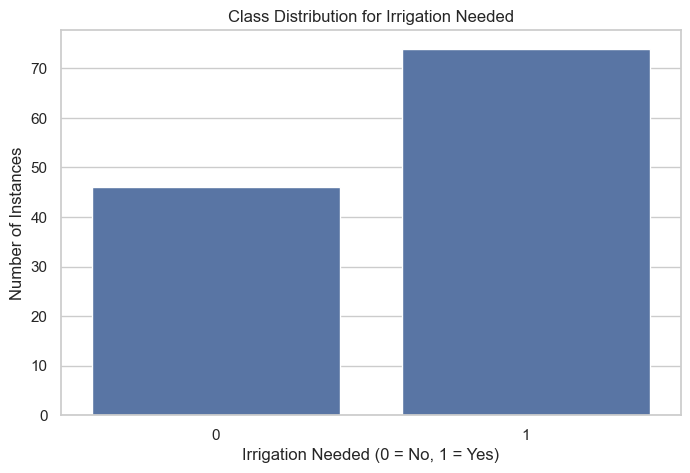

In [100]:
# Check the balance of the target variable
class_counts = df['Irrigation_Needed'].value_counts()
print("Class Counts:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution for Irrigation Needed')
plt.xlabel('Irrigation Needed (0 = No, 1 = Yes)')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

In [101]:
# Define features and target
X = df[['Soil_Moisture_10cm', 'Soil_Moisture_30cm', 'Soil_Moisture_50cm', 'Temperature', 'Humidity', 'Rainfall']]
y = df['Irrigation_Needed']

In [102]:
X

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
0,21.236204,43.260405,57.618343,22.763399,67.763918,3.378701
1,38.521429,46.363195,58.157143,27.865764,71.744921,5.571807
2,31.959818,26.130122,56.594576,24.165058,57.272464,3.540210
3,27.959755,18.851817,34.806348,25.912336,67.653485,1.774051
4,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717
...,...,...,...,...,...,...
115,36.143818,40.285824,45.696771,34.859296,58.437698,18.590583
116,34.110162,24.827033,21.060452,16.475931,70.053464,16.612388
117,15.597102,15.851059,43.431023,26.077086,40.339192,19.300538
118,36.776770,37.591530,57.609210,34.386051,41.537341,2.485944


In [103]:
y

0      0
1      0
2      0
3      1
4      1
      ..
115    0
116    1
117    1
118    0
119    1
Name: Irrigation_Needed, Length: 120, dtype: int64

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
42,11.031656,37.173540,35.023318,25.105047,88.194864,4.228960
12,34.973279,19.195288,54.045467,16.888859,46.642871,12.558008
15,15.502135,26.312103,42.272050,21.379513,51.201134,18.417448
114,29.002113,21.833505,22.822750,25.554022,83.807305,6.977365
76,33.138110,40.408449,36.358118,16.455260,38.040914,2.240778
...,...,...,...,...,...,...
106,22.311488,49.055369,45.403746,20.714242,34.551800,6.447077
14,15.454749,48.001840,26.779710,16.423773,57.821904,17.471572
92,32.823551,37.818644,20.575740,23.484440,53.792567,10.152208
51,33.253985,15.580574,21.493928,34.001239,89.983060,10.742131


In [106]:
X_test

,Soil_Moisture_10cm,Soil_Moisture_30cm,Soil_Moisture_50cm,Temperature,Humidity,Rainfall
44,17.763399,18.160142,43.131206,21.400992,80.299722,2.395243
47,25.602041,21.528148,41.705785,15.216753,46.404424,13.582046
4,14.680559,22.977731,20.618265,33.829296,65.058859,2.412717
55,37.656227,21.102825,40.889730,23.968910,86.685944,2.551606
26,15.990213,36.334752,47.880630,20.640691,84.655631,9.250694
64,18.428035,24.027957,49.043653,16.151175,67.087694,2.035649
73,34.463843,37.158551,58.505937,17.022454,63.656278,10.490228
10,10.617535,29.609385,31.777956,17.015560,57.339405,0.786243
40,13.661147,27.872410,55.600214,17.062477,65.647843,0.401424
107,32.666534,28.758420,21.812160,32.371983,37.732783,16.197489


In [107]:
y_train

42     1
12     1
15     1
114    1
76     0
      ..
106    0
14     1
92     1
51     1
102    1
Name: Irrigation_Needed, Length: 96, dtype: int64

In [108]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [109]:

# Fit the model
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [110]:
# Predict on the test set
y_pred = model.predict(X_test)

In [111]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.88      0.93      0.90        15

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.86        24
weighted avg       0.88      0.88      0.87        24



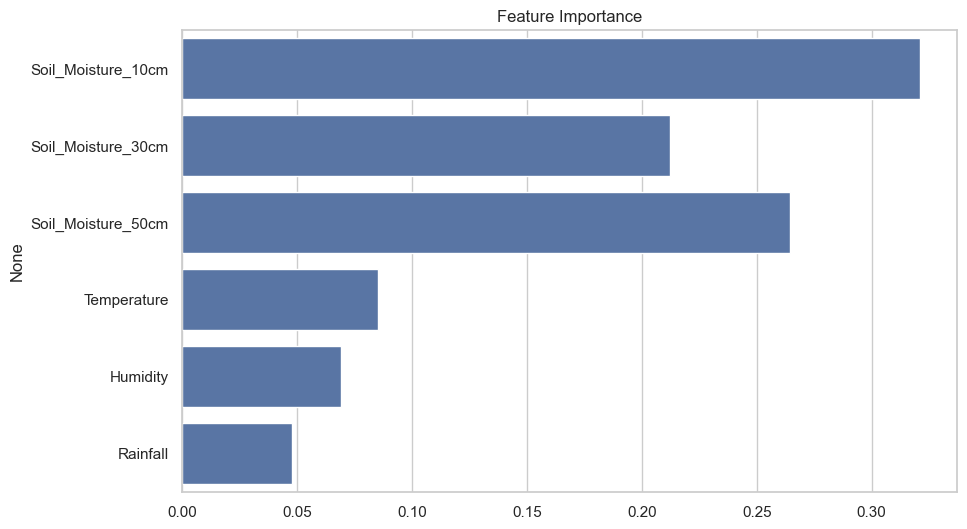

In [112]:
# Feature Importance
importance = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance')
plt.show()


1. Accuracy: 0.875
Definition: The ratio of correctly predicted instances (both positive and negative) to the total instances.
Interpretation: Your model is 87.5% accurate, meaning it correctly predicted whether irrigation is needed or not in 87.5% of the cases.
2. Precision, Recall, and F1-Score:
These metrics are shown for each class (0 and 1), where:

Class 0: Likely represents "No Irrigation Needed".
Class 1: Likely represents "Irrigation Needed".
a. Precision:

Class 0: 0.88 (88%)
Class 1: 0.88 (88%)
Definition: The proportion of true positive predictions among all positive predictions.
Interpretation: For both classes, when the model predicts either "No Irrigation" or "Irrigation", it is 88% correct.
b. Recall:

Class 0: 0.78 (78%)
Class 1: 0.93 (93%)
Definition: The proportion of actual positives correctly identified by the model.
Interpretation:
For Class 0, 78% of actual "No Irrigation Needed" cases were correctly identified.
For Class 1, 93% of actual "Irrigation Needed" cases were correctly identified.
c. F1-Score:

Class 0: 0.82 (82%)
Class 1: 0.90 (90%)
Definition: The harmonic mean of precision and recall, giving a balanced measure.
Interpretation:
For Class 0, the F1-Score is 82%, indicating a balance between precision and recall for "No Irrigation Needed".
For Class 1, the F1-Score is 90%, showing good performance in predicting "Irrigation Needed".

3. Macro Average:
Precision: 0.88, Recall: 0.86, F1-Score: 0.86
Definition: The unweighted average of metrics across all classes.
Interpretation: It shows the overall performance considering both classes equally.

4. Weighted Average:
Precision: 0.88, Recall: 0.88, F1-Score: 0.87
Definition: The average of metrics, weighted by the number of instances in each class.
Interpretation: This provides a performance metric that accounts for the class imbalance (if any).

Summary

Your model performs well overall, with high precision and recall, particularly for Class 1 ("Irrigation Needed").
Class 0 ("No Irrigation Needed") has a slightly lower recall, indicating some missed cases where the model might incorrectly suggest irrigation.
The accuracy of 87.5% and high F1-scores indicate a good balance between precision and recall.

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [119]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [120]:
# Evaluate Logistic Regression
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("\n")

Logistic Regression Model
Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.81      0.87      0.84        15

    accuracy                           0.79        24
   macro avg       0.78      0.77      0.77        24
weighted avg       0.79      0.79      0.79        24





In [121]:
# Gradient Boosting Classifier Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [123]:
# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier Model")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("\n")

Gradient Boosting Classifier Model
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.92      0.80      0.86        15

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.84        24





In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [114]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [116]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [125]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [126]:
# Evaluate the model
print("Decision Tree Classifier Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Model
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.92      0.80      0.86        15

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.84        24



In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [130]:
# Initialize the SVC model with default parameters
svc = SVC(random_state=42)

In [131]:
# Fit the model to the training data
svc.fit(X_train, y_train)

SVC(random_state=42)

In [132]:

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

In [133]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.875
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.83      1.00      0.91        15

    accuracy                           0.88        24
   macro avg       0.92      0.83      0.85        24
weighted avg       0.90      0.88      0.87        24



In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Different kernels to try
    'gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]               # Degree of the polynomial kernel function ('poly')
}


In [137]:
# Initialize the SVC model
svc = SVC(random_state=42)

In [138]:
# Set up GridSearchCV with the SVC model and parameter grid
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

In [139]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [140]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [141]:
# Use the best estimator to make predictions on the test set
best_svc = grid_search.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)

In [142]:
# Evaluate the tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best_svc))
print(classification_report(y_test, y_pred_best_svc))

Tuned Model Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.88      0.93      0.90        15

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.86        24
weighted avg       0.88      0.88      0.87        24



In [143]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Sample dataset (Replace with your actual dataset)
# X, y = your dataset features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9479
Test Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.88      0.93      0.90        15

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.86        24
weighted avg       0.88      0.88      0.87        24



Summary of Model Performance
Random Forest

Accuracy: 0.875
Precision (Class 0): 0.88 | Recall (Class 0): 0.78 | F1-Score (Class 0): 0.82
Precision (Class 1): 0.88 | Recall (Class 1): 0.93 | F1-Score (Class 1): 0.90
Macro Average: 0.88 | Weighted Average: 0.88
Support Vector Classifier (SVC)

Accuracy: 0.875
Precision (Class 0): 1.00 | Recall (Class 0): 0.67 | F1-Score (Class 0): 0.80
Precision (Class 1): 0.83 | Recall (Class 1): 1.00 | F1-Score (Class 1): 0.91
Macro Average: 0.92 | Weighted Average: 0.90
Hyperparameter Tuned SVC

Accuracy: 0.875
Same as SVC above.
Decision Tree (Best Hyperparameters)

Best Cross-Validation Accuracy: 0.9479 (This is significantly better than the test accuracy, indicating it may be prone to overfitting on the training data.)
Test Accuracy: 0.875
Precision, Recall, and F1-scores: Same as Random Forest.
Key Factors for Decision-Making
Performance Metrics:

All models have the same test accuracy (0.875).
The Random Forest and Decision Tree models show balanced precision and recall across classes, while the SVC model shows some imbalance. Specifically, SVC has high precision for class 0 but lower recall, meaning it misses some positive cases (class 1).
Interpretability:

The Decision Tree model is the most interpretable. You can easily visualize the decision paths and explain the model's predictions.
Random Forest is also interpretable through feature importance, but it’s less straightforward than a single Decision Tree.
Overfitting Concerns:

The Decision Tree's high cross-validation accuracy suggests it may overfit the training data, as indicated by the test accuracy being lower. If generalization to unseen data is critical, this could be a concern.
Random Forest, being an ensemble method, is less prone to overfitting and generally provides more stable predictions.
Feature Importance:

Random Forest provides insights into feature importance, which can be beneficial for understanding which inputs most significantly impact irrigation needs.
Recommendation
Considering the above factors:

Choose Random Forest:

It has a good balance of performance, robustness, and interpretability.
It mitigates the risk of overfitting compared to the Decision Tree.
You can analyze feature importance to gain insights into how different variables affect irrigation needs.
Consider Decision Tree if Interpretability is Critical:

If you need a model that's easy to explain to stakeholders, the Decision Tree might be preferred, but be cautious of potential overfitting.
Use SVC for Further Exploration:

If you have more time, you could further tune the SVC or explore other SVC kernels. However, based on current results, it doesn't seem to outperform the other models significantly.
Next Steps
Model Evaluation: Whichever model you choose, make sure to evaluate it on a validation set or through cross-validation to ensure that it generalizes well.
Feature Analysis: If using Random Forest, analyze feature importances and consider refining your model based on those insights.
Fine-Tuning: After selecting a model, consider further hyperparameter tuning to optimize performance.
Ultimately, the Random Forest model appears to be the most reliable choice for predicting Irrigation_Needed based on the results you've shared.






